In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
stats.binom(12,0.4).pmf(range(2))

array([0.00217678, 0.01741426])

Text(0.5, 1.0, 'Sum Up the Mass Function')

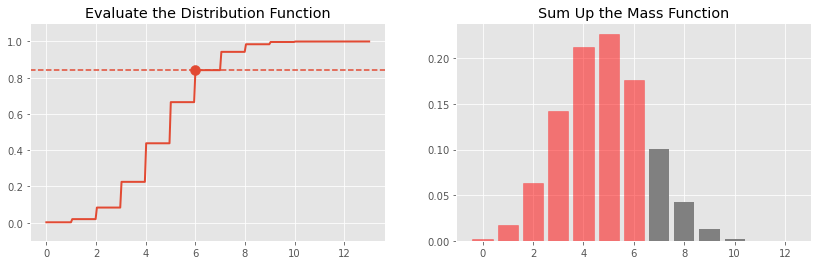

In [7]:
binomial = stats.binom(n=12, p=0.4)

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, binomial.cdf(x), linewidth=2)
ax[0].scatter(6, binomial.cdf(6), s=100)
ax[0].axhline(y=binomial.cdf(6), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Evaluate the Distribution Function")

bars = ax[1].bar(range(12 + 1), [binomial.pmf(i) for i in range(12 + 1)], align="center", color="grey")
for i in range(6 + 1):
    bars[i].set_color((1.0, 0, 0, 0.5))

ax[1].set_title("Sum Up the Mass Function")

Text(0.5, 1.0, 'The Jumps in the CDF are the Heights of the Bars')

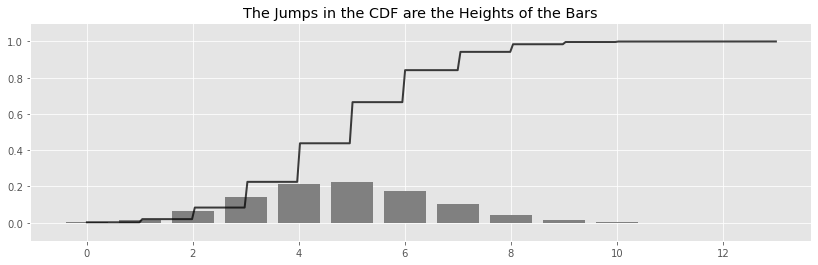

In [8]:
binomial = stats.binom(n=12, p=0.4)

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x, binomial.cdf(x), linewidth=2, color="black", alpha=0.75)
bars = ax.bar(range(12 + 1), [binomial.pmf(i) for i in range(12 + 1)], align="center", color="grey")

ax.set_ylim(-0.1, 1.1)
ax.set_title("The Jumps in the CDF are the Heights of the Bars")

# Discrete Distribution Catalog

In [41]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = [f"{name}={value}" for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')

def draw_pmf_grid(dist, param_names, param_values, xpts, height=2):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend()
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()


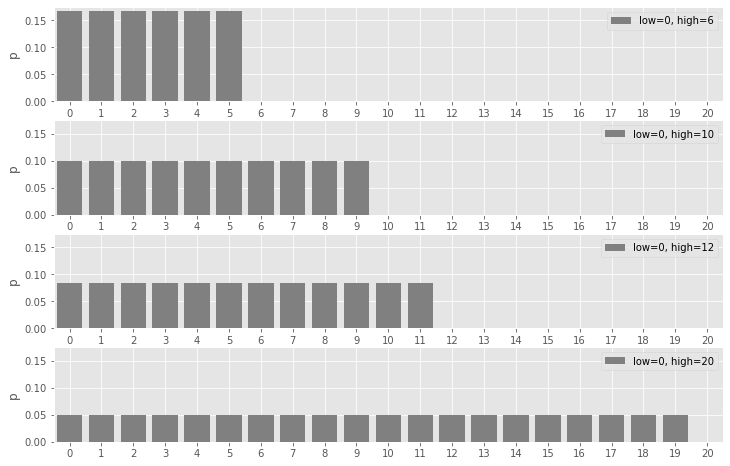

In [76]:
draw_pmf_grid(stats.randint, 
              param_names=('low', 'high'), 
              param_values=[(0, 6), (0, 10), (0, 12), (0, 20)],
              xpts=range(21))

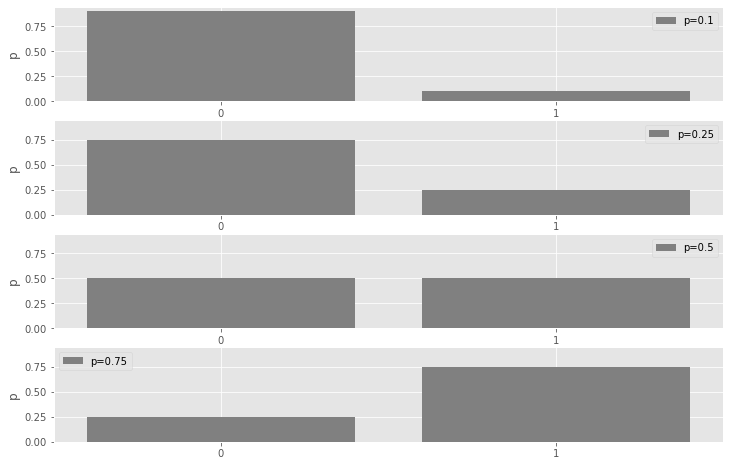

In [78]:
draw_pmf_grid(stats.bernoulli, 
              param_names='p', 
              param_values=[(0.1,), (0.25,), (0.5,), (.75,)],
              xpts=[0, 1])

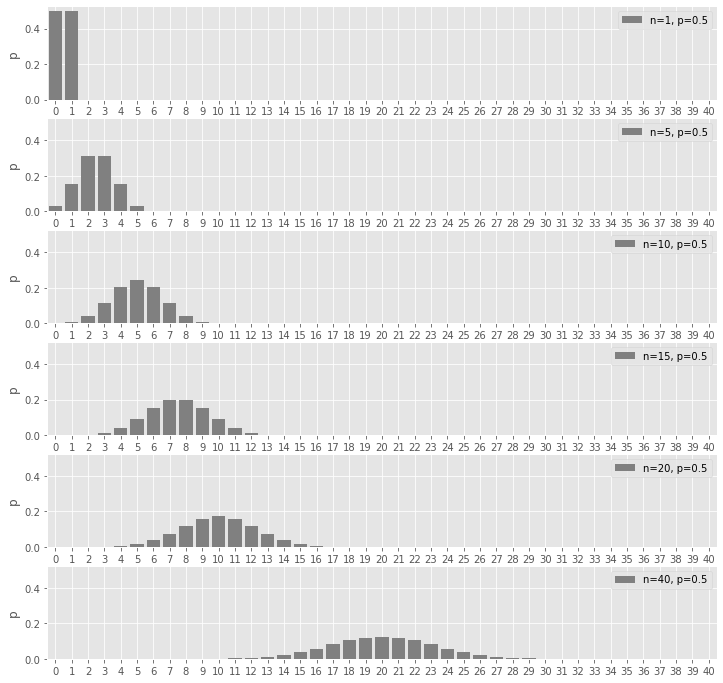

In [79]:
draw_pmf_grid(stats.binom, 
              param_names=('n', 'p'), 
              param_values=[(1, 0.5), (5, 0.5), (10, 0.5), (15, 0.5), (20, 0.5), (40, 0.5)], 
              xpts=range(0, 41))

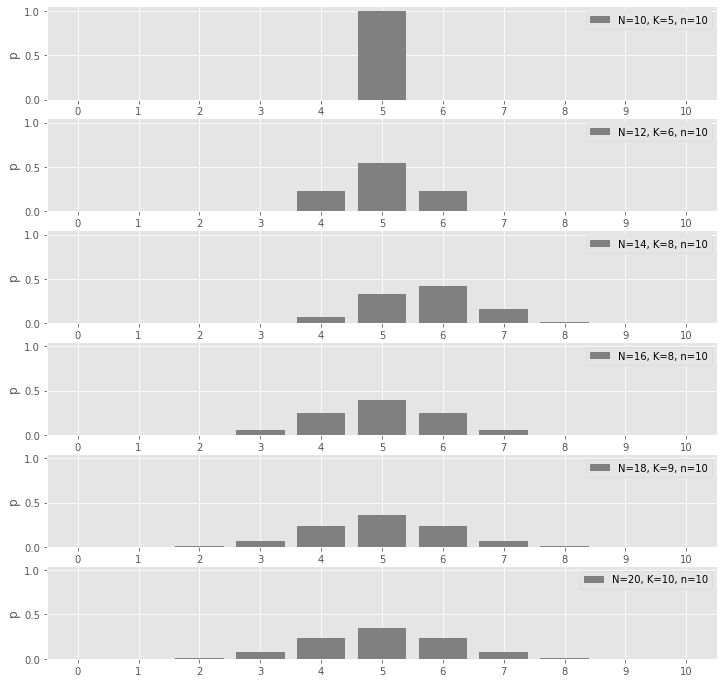

In [80]:
draw_pmf_grid(
    stats.hypergeom, 
    ('N', 'K', 'n'), 
    [(10, 5, 10), (12, 6, 10), (14, 8, 10), (16, 8, 10), (18, 9, 10), (20, 10, 10)], 
    range(0, 11))

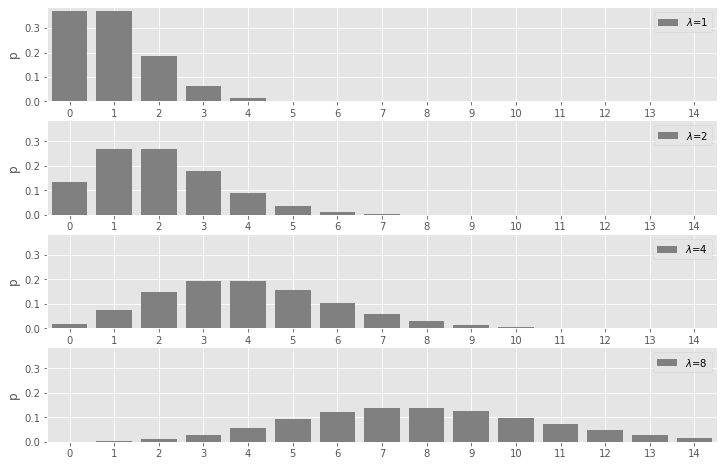

In [85]:
draw_pmf_grid(stats.poisson,
              param_names=('$\lambda$',), 
              param_values=[(1,), (2,), (4,), (8,)], 
              xpts=range(15))

# Continuous Distribution Catalog

In [86]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)

def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Probability')
    axs[1].set_ylabel('Probability Density')
    axs[0].legend()
    axs[1].legend()

In [87]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)

def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Probability')
    axs[1].set_ylabel('Probability Density')
    axs[0].legend()
    axs[1].legend()

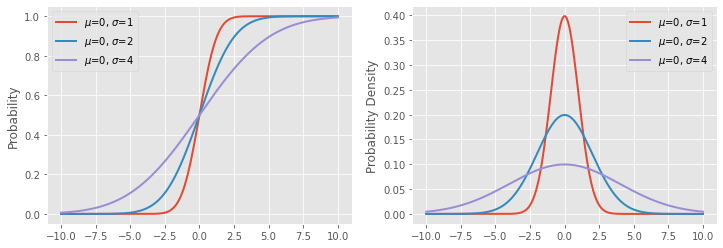

In [88]:
draw_continuous_distributions(stats.norm, ("$\mu$", "$\sigma$"), [(0,1),(0,2),(0,4)], -10, 10)


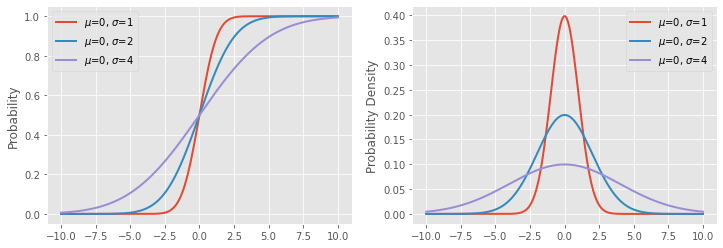

In [89]:
draw_continuous_distributions(stats.norm, (r"$\mu$", r"$\sigma$"), [(0,1),(0,2),(0,4)], -10, 10)

In [2]:
import scipy.stats as stats

In [3]:
#X ~ Binomial(n=20, p=0.1)

#P(X = 2)
# 20 C 2 is 20 choose 2
#= (20 C 2) * (0.1 ^ 2) * (1 - 0.1) ^ 18
#= (20! / 2! * 18!) * (0.1 ^ 2) * (1 - 0.1) ^ 18
#~= 0.285

dist = stats.binom(20, 0.1)
print ("P(X = 2) = ", dist.pmf(2))

P(X = 2) =  0.28517980706429813


In [5]:
lmbda = 5/48*24
k=4
stats.poisson(mu=lmbda).cdf(3)

0.7575761331330662

In [6]:
n = 20
p = 0.1
k = 2

stats.binom(n,p).cdf(2)

0.6769268051894661